In this work, we implement linear regression using simple neural network with TensorFlow 2.x version. For testing, we can use the same sample data set as this [work](https://github.com/EeYeoKeat/Machine_Learning_Mathematics/blob/master/Linear_Regression/Univariate_Linear_Regression.ipynb) and compare the performance.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

print(tf.__version__)

2.2.0-rc2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('fabricated_points.csv')
data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


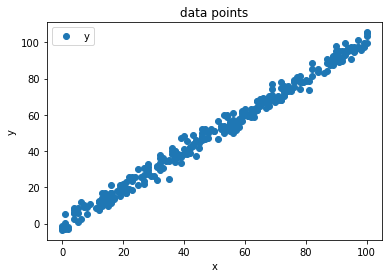

In [3]:
data.plot(x='x', y='y', style='o')  
plt.title('data points')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.show()

In [18]:
X = np.array(data['x']).reshape(-1,1)
Y = np.array(data['y']).reshape(-1,1)
print('X has shape: ', X.shape)
print('Y has shape: ', Y.shape)

X has shape:  (300, 1)
Y has shape:  (300, 1)


In [0]:
layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 
model = tf.keras.Sequential([layer_0])

In [20]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(X, Y, epochs=500, verbose=False)
print('Training done')

Training done


Let's check for prediction result, and we pick the index 2, x value is 22	and y actual value is 25.609262

In [21]:
model.predict([22])

array([[22.013939]], dtype=float32)

In [22]:
actual_ouput = data.iloc[2]
actual_ouput

x    22.000000
y    25.609262
Name: 2, dtype: float64

We can see that is some variation between predicted output 22.01818 and the actual y value 25.609262. Let's check on cost function value across the epochs.

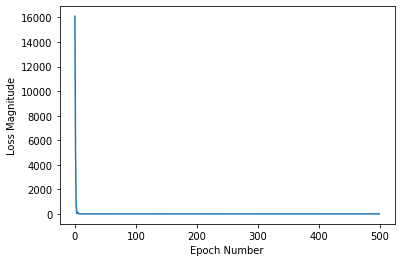

In [23]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

The loss magnitude is decrease sharply. In real world complex problem, the loss magnitude may not converge as fast as this. Anyway, the loss magnitude is decrease near to 0 which is good sign.

In [24]:
m, c = layer_0.get_weights()
print("These are the layer variables: {}".format(layer_0.get_weights()))
print("m : %f" %m)
print("b : %f" %c)

These are the layer variables: [array([[1.021037]], dtype=float32), array([-0.448875], dtype=float32)]
m : 1.021037
b : -0.448875


We can plot the variables that learned by the neural network and check if it is fit to the data points.

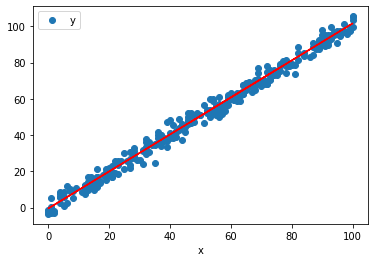

In [25]:
data.plot(x='x', y='y', style='o')  
plt.plot(X, (m * X)+c, c='red')
plt.show()

Awesome! The neural network model training perform well. Compare to the [work](https://github.com/EeYeoKeat/Machine_Learning_Mathematics/blob/master/Linear_Regression/Univariate_Linear_Regression.ipynb) which using self-build linear regression model, neural network perform much more better.